In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
from scipy import stats 
import math

In [4]:
# SPARCS data 
sparcs_df_14 = pd.read_csv("primary_data/NYSDOH_Hospital_Inpatient_Discharges_SPARCS_De-Identified_2014.csv")
sparcs_df_13 = pd.read_csv("primary_data/NYSDOH_Hospital_Inpatient_Discharges_SPARCS_De-Identified_2013.csv")
sparcs_df_12 = pd.read_csv("primary_data/NYSDOH_Hospital_Inpatient_Discharges_SPARCS_De-Identified_2012.csv")
sparcs_df_11 = pd.read_csv("primary_data/NYSDOH_Hospital_Inpatient_Discharges_SPARCS_De-Identified_2011.csv")
sparcs_df_10 = pd.read_csv("primary_data/NYSDOH_Hospital_Inpatient_Discharges_SPARCS_De-Identified_2010.csv")
sparcs_df_09 = pd.read_csv("primary_data/NYSDOH_Hospital_Inpatient_Discharges_SPARCS_De-Identified_2009.csv")

#merge years into one large data set
frames = [sparcs_df_14, sparcs_df_13, sparcs_df_12, sparcs_df_11, sparcs_df_10, sparcs_df_09]
sparcs_df = pd.concat(frames)

# delete loaded spreadsheets to free up space
del sparcs_df_14
del sparcs_df_13
del sparcs_df_12
del sparcs_df_11
del sparcs_df_10
del sparcs_df_09
del frames

# save merged data file so don't have to do this again...
sparcs_df.to_csv("primary_data/merged_data.csv")

In [4]:
# More data prep
sparcs_df = pd.read_csv("primary_data/merged_data.csv")

C:\Users\samko\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (24,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# define columns to drop
cols_to_drop = ['APR MDC Code',
       'APR MDC Description', 'APR Medical Surgical Description',
       'APR Severity of Illness Description', 'Abortion Edit Indicator',
       'Attending Provider License Number', 'Birth Weight',
       'CCS Diagnosis Code', 'CCS Diagnosis Description','Emergency Department Indicator',
       'Operating Certificate Number', 'Operating Provider License Number',
       'Other Provider License Number','Payment Typology 2', 'Payment Typology 3']

# delete columns that aren't used to speed up analysis
for col in cols_to_drop: 
    sparcs_df.drop(col, 1, inplace=True)
    
# save filtered one so you don't have to do this again
sparcs_df.to_csv("primary_data/filtered_merged_data.csv")

In [9]:
# Start here for any repeat
sparcs_df = pd.read_csv("primary_data/filtered_merged_data.csv")

In [6]:
# df w/ procedure names w/  counts to find quantify number of caths
proc_df = sparcs_df.groupby("CCS Procedure Description").size().sort_values(
    ascending=False).reset_index(
    name="procedure counts")

# CSV of procedure names w/ counts
proc_df.to_csv("procedure_counts.csv")

# Procedures of interest:
DX CARDIAC CATHETERIZTN = 180058


PERC TRANSLUM COR ANGIO = 206731


In [43]:
# top 20 most common procedures
proc_df.head(20)

,CCS Procedure Description,procedure counts
0,NO PROC,3822703
1,OTHER THERAPEUTIC PRCS,956934
2,CESAREAN SECTION,476255
3,PROPHYLACTIC VAC/INOCUL,447588
4,ALCO/DRUG REHAB/DETOX,415835
5,OT PRCS TO ASSIST DELIV,410972
6,RESP INTUB/MECH VENTIL,404932
7,REPAIR CUR OBS LACERATN,331283
8,CIRCUMCISION,313236
9,OPHTHALM-/OT-OLOGIC DX,309593


In [44]:
# df of all indivitual caths performed
cath_df = sparcs_df[(sparcs_df["CCS Procedure Description"].str.upper() == "DX CARDIAC CATHETERIZTN") |
                   (sparcs_df["CCS Procedure Description"].str.upper() == "PERC TRANSLUM COR ANGIO")]

In [48]:
# upper case columns for more accurate classification
cath_df["APR DRG Description"] = cath_df["APR DRG Description"].str.upper()
cath_df["Facility Name"] = cath_df["Facility Name"].str.upper()
cath_df["Patient Disposition"] = cath_df["Patient Disposition"].str.upper()

C:\Users\samko\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\samko\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\samko\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [50]:
# df of cath counts per diagnosis
dx_cath_df = cath_df.groupby("APR DRG Description").size().sort_values(
    ascending=False).reset_index(
    name="cath counts per dx")

# CSV of cath counts per diagnosis
dx_cath_df.to_csv("cath_counts_per_dx.csv")

# DRG Descriptions of  Diagnoses of Interest

Obtained cath counts per dx to see see which diagnoses were relevant to analysis

In [242]:
# cath counts per dx - top 20
dx_cath_df.head(20)

,APR DRG Description,cath counts per dx
0,PERCUTANEOUS CARDIOVASCULAR PROCEDURES W/O AMI,87866
1,PERCUTANEOUS CORONARY INTERVENTION W/O AMI,49533
2,CARDIAC CATHETERIZATION FOR ISCHEMIC HEART DIS...,46292
3,PERCUTANEOUS CORONARY INTERVENTION W AMI,38496
4,PERCUTANEOUS CARDIOVASCULAR PROCEDURES W AMI,34982
5,CARDIAC CATHETERIZATION FOR OTHER NON-CORONARY...,33321
6,ACUTE MYOCARDIAL INFARCTION,29885
7,CARDIAC CATHETERIZATION W CIRC DISORD EXC ISCH...,23963
8,CARDIAC CATHETERIZATION FOR CORONARY ARTERY DI...,23654
9,MODERATELY EXTENSIVE PROCEDURE UNRELATED TO PR...,1851


## Diagnoses of interest

PERCUTANEOUS CARDIOVASCULAR PROCEDURES W/O AMI<br />
PERCUTANEOUS CORONARY INTERVENTION W/O AMI<br />
CARDIAC CATHETERIZATION FOR ISCHEMIC HEART DISEASE<br />
PERCUTANEOUS CORONARY INTERVENTION W AMI<br />
PERCUTANEOUS CARDIOVASCULAR PROCEDURES W AMI<br />
ACUTE MYOCARDIAL INFARCTION<br />
CARDIAC CATHETERIZATION W CIRC DISORD EXC ISCHEMIC HEART DISEASE<br />
CARDIAC CATHETERIZATION FOR CORONARY ARTERY DISEASE<br />

*****************

### Exclude:<br />
CARDIAC CATHETERIZATION FOR OTHER NON-CORONARY CONDITIONS

Note: this is probably kind of arbitrary, and for your analysis, it may be fine to just look at all caths

In [231]:
# Dx of CAD
CAD_dx_list = ["PERCUTANEOUS CARDIOVASCULAR PROCEDURES W/O AMI",
"PERCUTANEOUS CORONARY INTERVENTION W/O AMI",
"CARDIAC CATHETERIZATION FOR ISCHEMIC HEART DISEASE",
"PERCUTANEOUS CORONARY INTERVENTION W AMI",
"PERCUTANEOUS CARDIOVASCULAR PROCEDURES W AMI",
#"CARDIAC CATHETERIZATION FOR OTHER NON-CORONARY CONDITIONS",
"ACUTE MYOCARDIAL INFARCTION",
"CARDIAC CATHETERIZATION W CIRC DISORD EXC ISCHEMIC HEART DISEASE",
"CARDIAC CATHETERIZATION FOR CORONARY ARTERY DISEASE"]

# subset of dataset where caths were done for CAD; dataset of interest for our analysis
CAD_cath_df = cath_df[cath_df["APR DRG Description"].isin(CAD_dx_list)]

# get toal caths in new CAD df and total caths outside this df
total_CAD = dx_cath_df[dx_cath_df['APR DRG Description'].isin(
    CAD_dx_list)]['cath counts per dx'].sum()
total_non_CAD= dx_cath_df[~dx_cath_df['APR DRG Description'].isin(
    CAD_dx_list)]['cath counts per dx'].sum()

# Num of caths in CAD dx group vs non-CAD dx group

CAD: 334,671<br />
non-CAD: 52,118

# A couple of the APR DRG Descriptions above correspond to the same APR Diagnostic Code, so use DRG code instead of DRG description

In [217]:
DRG_dx_map = CAD_cath_df[['APR DRG Code', 'APR DRG Description']
                        ].drop_duplicates().reset_index(drop=True).sort_values('APR DRG Code')
DRG_dx_map

,APR DRG Code,APR DRG Description
1,174,PERCUTANEOUS CORONARY INTERVENTION W AMI
7,174,PERCUTANEOUS CARDIOVASCULAR PROCEDURES W AMI
3,175,PERCUTANEOUS CORONARY INTERVENTION W/O AMI
6,175,PERCUTANEOUS CARDIOVASCULAR PROCEDURES W/O AMI
0,190,ACUTE MYOCARDIAL INFARCTION
2,191,CARDIAC CATHETERIZATION FOR CORONARY ARTERY DI...
4,191,CARDIAC CATHETERIZATION W CIRC DISORD EXC ISCH...
5,192,CARDIAC CATHETERIZATION FOR ISCHEMIC HEART DIS...


In [52]:
# df of hospitals that did caths for CAD diagnoses
hospital_df = pd.DataFrame(CAD_cath_df["Facility Name"].unique())
hospital_df = hospital_df.rename(columns={0 : "hospitals"}).sort_values(by="hospitals").reset_index(drop=True)

# save to CSV file
hospital_df.to_csv("hospital_list.csv")

In [54]:
# caths_per_site_df
caths_per_site_df = CAD_cath_df.groupby("Facility Name").size().sort_values(
    ascending=False).reset_index(
    name="cath counts per hosp")

# store in CSV file
caths_per_site_df.to_csv('caths_per_hospital.csv')

# Sites where fellows work

List of current new york cardiology fellowships here: https://services.aamc.org/eras/erasstats/par/display.cfm?NAV_ROW=PAR&SPEC_CD=141<br />
Newly accredited fellowships by year can be found here: https://apps.acgme.org/ads/Public/Reports/Report/8<br />
Now new fellowships in NY over our period of analysis<br>
Determined whether fellows worked at site using google

In [243]:
# import fellow sites 
fellow_sites_df = pd.read_csv("fellowship_locations.csv")
fellow_sites_df.head(20)

,Hospitals,Fellows
0,Albany Medical Center Hospital,1
1,Albany Memorial Hospital,1
2,Arnot Ogden Medical Center,0
3,Bellevue Hospital Center,1
4,Benedictine Hospital,0
5,Beth Israel Medical Center/Petrie Campus,1
6,Bronx-Lebanon Hospital Center - Concourse Divi...,0
7,Brookdale Hospital Medical Center,1
8,Brookhaven Memorial Hospital Medical Center Inc,0
9,Brooklyn Hospital Center - Downtown Campus,1


In [227]:
# Get array of fellow sites, cast as str type, make it upper case for matching
fellow_sites = fellow_sites_df[fellow_sites_df['Fellows'] == 1]['Hospitals'].values
fellow_sites = np.char.upper(fellow_sites.astype(str))

In [234]:
# helper function for labeling facilities as fellowship training sites 
def fellow_site_generator(df):
    if df["Facility Name"] in fellow_sites:
        return True
    else: 
        return False

# add column to each entry indicating whether happened at institution where fellows work
CAD_cath_df['Fellows'] = CAD_cath_df.apply(fellow_site_generator, axis=1)

In [233]:
# helper column for counts
CAD_cath_df['counts'] = CAD_cath_df.apply(lambda x: 1, axis=1)

In [232]:
# clean CAD_cath_df
CAD_cath_df = CAD_cath_df.reset_index().drop(['index', 'Unnamed: 0'], 1)

# need to remove instances where LOS > 120 days; complicates analysis...
# this is too bad becaue they were interesting visits
# list of 18 occurances where it happened
LOS_too_long = CAD_cath_df[CAD_cath_df['Length of Stay'] == "120 +"]

# update df to remove those instances
CAD_cath_df = CAD_cath_df[CAD_cath_df['Length of Stay'] != "120 +"]
CAD_cath_df['Length of Stay'] = CAD_cath_df['Length of Stay'].values.astype(int)

# helper function for converting strings to floats for total cost
def make_float(x):
    if type(x) == str:
        x = float(x.replace(",",""))
    return x

# make strings floats in cost column
CAD_cath_df['Total Costs'] = CAD_cath_df['Total Costs'].apply(make_float)

In [67]:
# make a fellows and non_fellows separate df's
fellows_df = CAD_cath_df[CAD_cath_df["Fellows"] == True]
non_fellows_df = CAD_cath_df[CAD_cath_df["Fellows"] == False]

In [108]:
# define a function that takes a df and an outocme measure and generates useful summary statistics
def stat_generator(df, outcome):
    
    outcome_df = pd.DataFrame(columns=['count', 
                                     'mean',
                                       'median',
                                     'std',
                                     'max', 
                                     'min'])
    
    for status in df['Fellows'].unique():
        series = df[df['Fellows'] == status][outcome]
        count = len(series)
        avg = series.mean()
        median = series.median()
        std = series.std()
        max_outcome = series.max()
        min_outcome = series.min()
        if status == True:
            outcome_df.loc[outcome + " w/ Fellows", :] = count, avg, median, std, max_outcome, min_outcome
        else: 
            outcome_df.loc[outcome + " w/o Fellows", :] = count, avg, median, std, max_outcome, min_outcome
    return outcome_df
        

In [213]:
# make list of tuples of dx and summary stat df's for both los and cost
dx_codes = DRG_dx_map['APR DRG Code'].unique()

los_df_lst = []
cost_df_lst =[]
for dx in dx_codes:
    dx_df = CAD_cath_df[CAD_cath_df["APR DRG Code"] == dx]
    los = stat_generator(dx_df, 'Length of Stay')
    cost = stat_generator(dx_df, 'Total Costs')
    los.name = dx
    cost.name = dx
    los_df_lst.append(los)
    cost_df_lst.append(cost)
    
# some print outs for total costs in fellow sites vs non-fellow sites per dx
f = open('los_by_dx.csv', "w+")
f.close()
for x in los_df_lst:
    with open('los_by_dx.csv', 'a') as f:
        f.write(str(x.name))
        x.to_csv(f)
        f.write('\n')
        
# some print outs for total costs in fellow sites vs non-fellow sites per dx
f = open('cost_by_dx.csv', "w+")
f.close()
for x in cost_df_lst:
    with open('cost_by_dx.csv', 'a') as f:
        f.write(str(x.name))
        x.to_csv(f)
        f.write('\n')

# LOS at fellow vs non-fellow sites across all CAD dx

In [109]:
# summary statistics of LOS for fellow vs non-fellow sites
stat_generator(CAD_cath_df, 'Length of Stay')

,count,mean,median,std,max,min
Length of Stay w/o Fellows,110912,3.29521,2,3.30057,103,1
Length of Stay w/ Fellows,223741,3.2333,2,4.08412,117,1


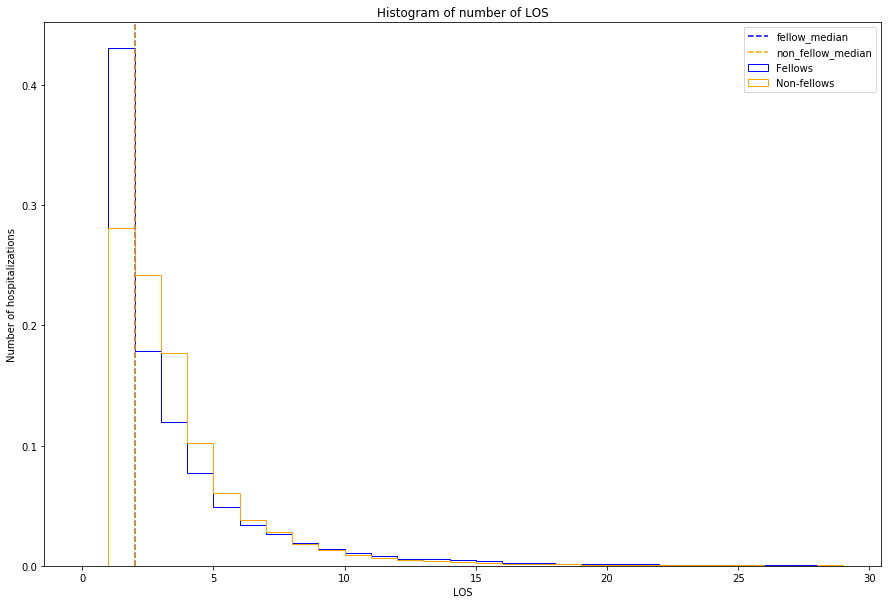

In [238]:
# Normed histogram of LOS by fellow vs non-fellow institutions
bins = np.arange(0, 30, 1)
plt.figure(1, figsize=(15,10))
plt.hist(fellows_df["Length of Stay"], bins=bins, 
         histtype='step', label="Fellows", color='blue', normed=True)
plt.hist(non_fellows_df["Length of Stay"], bins=bins, 
         histtype='step', label="Non-fellows", color='orange', normed=True)
plt.xlabel("LOS")
plt.ylabel("Number of hospitalizations")
plt.axvline(np.median(fellows_df["Length of Stay"]), 
            color='blue', label = 'fellow_median', linestyle='dashed')
plt.axvline(np.median(non_fellows_df["Length of Stay"]), 
            color='orange', label="non_fellow_median", linestyle='dashed')
plt.title("Histogram of number of LOS")
plt.legend()
plt.show()

# Total Costs per hospitalization for hospitalizations for caths for CAD at fellow vs non-fellow sites

In [113]:
stat_generator(CAD_cath_df, "Total Costs").to_csv('all_dx_total_costs.csv')
stat_generator(CAD_cath_df, "Total Costs")

,count,mean,median,std,max,min
Total Costs w/o Fellows,110912,13165.7,11114.6,9642.6,221728,0.29
Total Costs w/ Fellows,223741,16918.3,13136.2,16078.5,803085,770.27


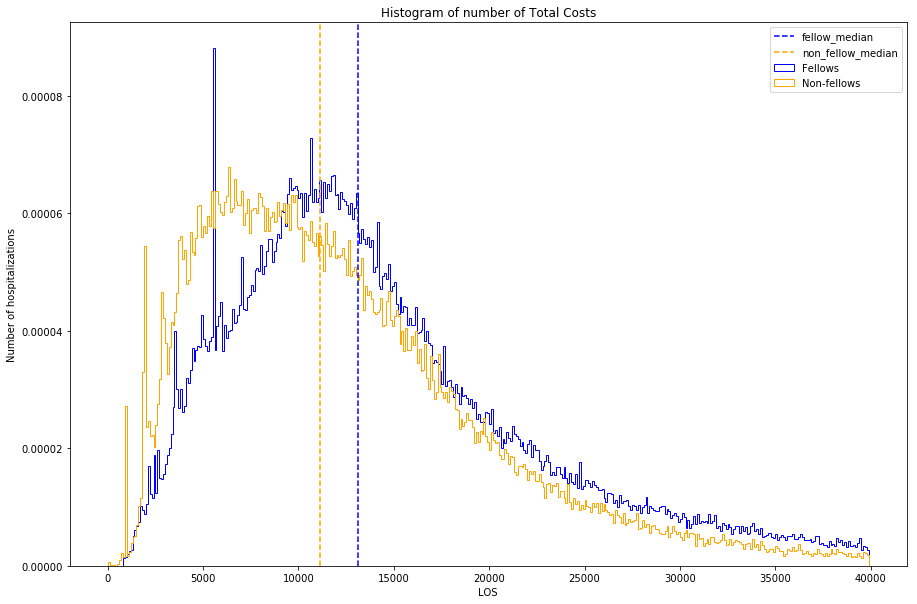

In [236]:
# Normed histogram of LOS by fellow vs non-fellow institutions
bins = np.arange(0, 40000, 100)
plt.figure(1, figsize=(15,10))
plt.hist(fellows_df["Total Costs"], bins=bins,
         histtype='step', label="Fellows", color='blue', normed=True)
plt.hist(non_fellows_df["Total Costs"], bins=bins, 
         histtype='step', label="Non-fellows", color='orange', normed=True)
plt.xlabel("LOS")
plt.ylabel("Number of hospitalizations")
plt.axvline(np.median(fellows_df["Total Costs"]), 
            color='blue', label = 'fellow_median', linestyle='dashed')
plt.axvline(np.median(non_fellows_df["Total Costs"]), 
            color='orange', label="non_fellow_median", linestyle='dashed')
plt.title("Histogram of number of Total Costs")
plt.legend()
plt.show()

### Caths per diagnosis

In [239]:
# table showing number of caths per diagnosis depending on whether fellow site or non-fellow site
count_table = pd.pivot_table(CAD_cath_df,
                            values="counts", 
                             index='APR DRG Code',
                              columns="Fellows",
                              aggfunc=np.sum)
count_table

Fellows,False,True
APR DRG Code,,
174,29911,43563
175,29269,108128
190,13746,16138
191,18209,29398
192,19777,26514


### Histograms of above per diagnosis

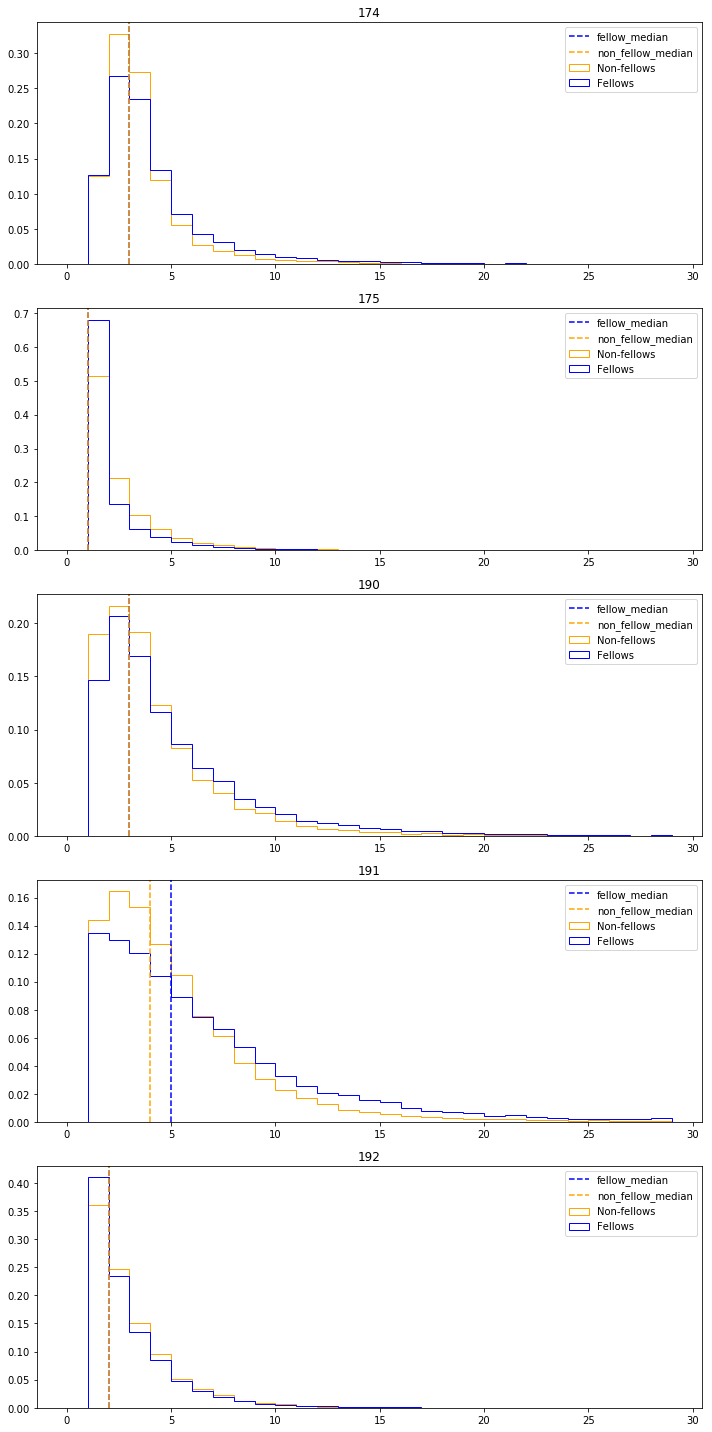

In [240]:
# Normed histograms of LOS by dx
ind = 1
for dx in dx_codes:
    bins = np.arange(0, 30, 1)
    fellow_data = CAD_cath_df[(CAD_cath_df['APR DRG Code'] == dx) & 
                              (CAD_cath_df['Fellows'] == True)]['Length of Stay'].values
    non_fellow_data = CAD_cath_df[(CAD_cath_df['APR DRG Code'] == dx) 
                                  & (CAD_cath_df['Fellows'] == False)]['Length of Stay'].values
    fig = plt.figure(1, figsize=(10,20))
    ax = fig.add_subplot(5 , 1, ind)
    hg = ax.hist([fellow_data, non_fellow_data], 
                 bins=bins, histtype='step', 
                 label=['Fellows', 'Non-fellows'], 
                 color=['blue', 'orange'], 
                 normed=True)
    
    fellow_med = np.median(fellow_data)
    non_fellow_med = np.median(non_fellow_data)
    plt.axvline(fellow_med, color='blue', label = 'fellow_median', linestyle='dashed')
    plt.axvline(non_fellow_med, color='orange', label="non_fellow_median", linestyle='dashed')
    plt.title(dx)
    plt.legend()
    plt.tight_layout()
    
    ind += 1

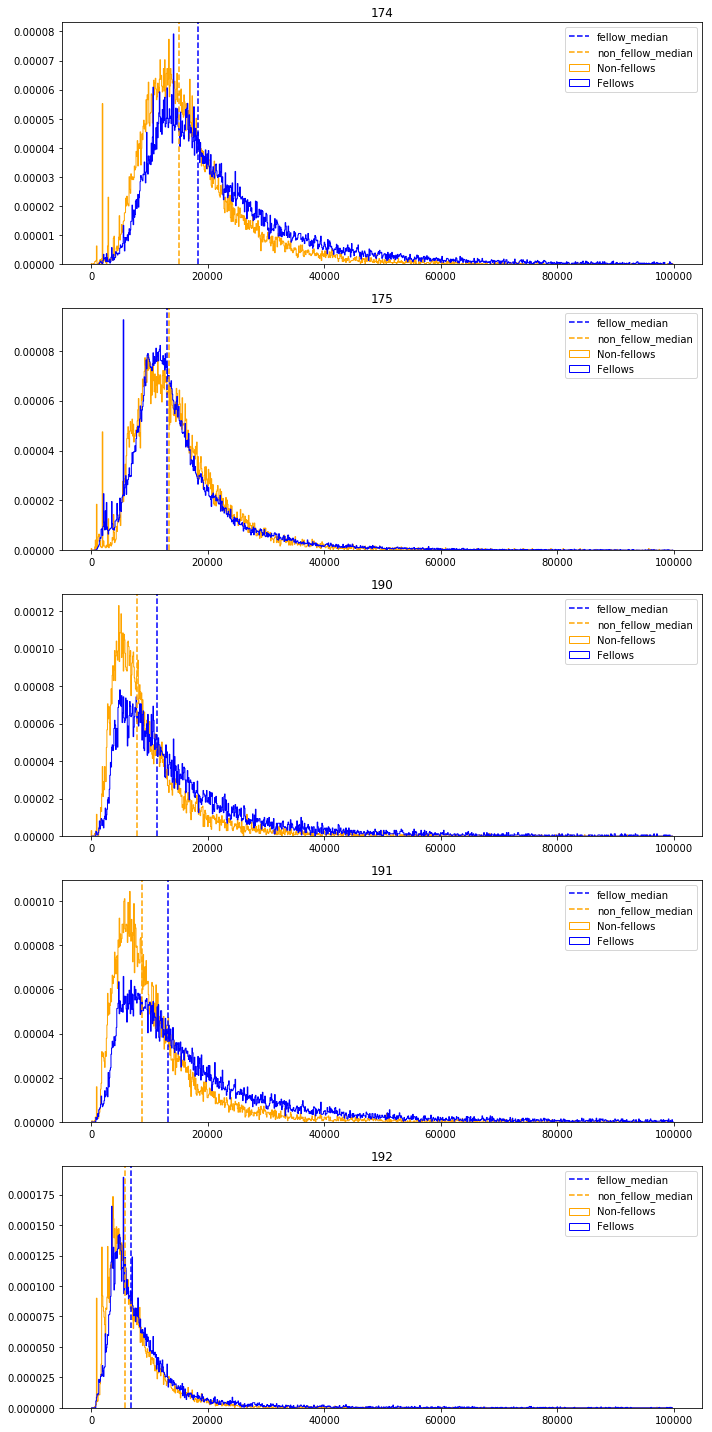

In [184]:
# Normed histograms of cost by dx
ind = 1
for dx in dx_codes:

    fellow_data = CAD_cath_df[(CAD_cath_df['APR DRG Code'] == dx) & 
                              (CAD_cath_df['Fellows'] == True)]['Total Costs'].values
    non_fellow_data = CAD_cath_df[(CAD_cath_df['APR DRG Code'] == dx) 
                                  & (CAD_cath_df['Fellows'] == False)]['Total Costs'].values
    fig = plt.figure(1, figsize=(10,20))
    ax = fig.add_subplot(5 , 1, ind)
    
    bins = np.arange(0, 100000, 100)
    
    hg = ax.hist([fellow_data, non_fellow_data], 
                 bins=bins, histtype='step', 
                 label=['Fellows', 'Non-fellows'], 
                 color=['blue', 'orange'], 
                 normed=True)
    
    fellow_med = np.median(fellow_data)
    non_fellow_med = np.median(non_fellow_data)
    plt.axvline(fellow_med, color='blue', label = 'fellow_median', linestyle='dashed')
    plt.axvline(non_fellow_med, color='orange', label="non_fellow_median", linestyle='dashed')

    
    plt.title(dx)
    plt.legend()
    plt.tight_layout()

    
    ind += 1

# Death rates at fellow vs non-fellow sites stratified by severity of illness

In [121]:
# deaths, total discharges, death rate and percent at that level of severity
sev_totals = CAD_cath_df.groupby('Fellows')['counts'].sum().values
death_rate_df = pd.DataFrame(columns=['num_deaths','total_discharges','death_rate', 'proportion_at_severity'])
gb = CAD_cath_df.groupby(["Fellows", 'APR Severity of Illness Code'])

idx = 0
for k, gp in gb:
    sev_total = sev_totals[math.floor(idx/4)]
    deaths = gp[gp['Patient Disposition'] == 'EXPIRED'].shape[0]
    total_dcs = int(gp.shape[0])
    death_rate = deaths / total_dcs
    sev_rate = total_dcs / sev_total
    if k[0] == False:
        k = "Non-fellow, severity index " + str(k[1])
    else:
        k = "Fellow, severity index " + str(k[1])
    death_rate_df.loc[str(k), :] = deaths, total_dcs, death_rate, sev_rate
    idx += 1
    
death_rate_df

,num_deaths,total_discharges,death_rate,proportion_at_severity
"Non-fellow, severity index 1",13,40744,0.000319065,0.367354
"Non-fellow, severity index 2",60,42190,0.00142214,0.380392
"Non-fellow, severity index 3",214,23619,0.0090605,0.212953
"Non-fellow, severity index 4",460,4359,0.105529,0.0393014
"Fellow, severity index 1",11,88684,0.000124036,0.396369
"Fellow, severity index 2",78,80842,0.000964845,0.36132
"Fellow, severity index 3",331,45380,0.00729396,0.202824
"Fellow, severity index 4",1042,8835,0.11794,0.0394876


In [188]:
# Average Severity of illness of fellows vs non-fellows
CAD_cath_df.groupby('Fellows').agg({
    "APR Severity of Illness Code" : np.mean
})

,APR Severity of Illness Code
Fellows,
False,1.924201
True,1.885430


In [122]:
# Average illness severity for each diangosis by fellow vs. non-fellow site
illness_severity = pd.pivot_table(CAD_cath_df, 
                               values="APR Severity of Illness Code",
                               index='APR DRG Code',
                              columns="Fellows",
                              aggfunc=np.mean)
illness_severity

Fellows,False,True
APR DRG Code,,
174,1.855806,1.984345
175,1.710752,1.644394
190,2.160920,2.273206
191,2.487067,2.597456
192,1.660768,1.680395


# Number of hospitalizations by admission type

In [211]:
# urgency of admission comparison
admission_type_df = CAD_cath_df.groupby(['Fellows', 'Type of Admission'])['counts'].sum().reset_index()
f_admission_type_df = admission_type_df[admission_type_df['Fellows'] == True]
n_admission_type_df = admission_type_df[admission_type_df['Fellows'] == False]
f_total = f_admission_type_df['counts'].sum()
n_total = n_admission_type_df['counts'].sum()
f_admission_type_df['proportion'] = f_admission_type_df['counts'].apply(lambda x: x / f_total)
n_admission_type_df['proportion'] = n_admission_type_df['counts'].apply(lambda x: x / n_total)
admit_type_df = f_admission_type_df.append(n_admission_type_df, ignore_index=True)
admit_type_df

C:\Users\samko\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\samko\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Fellows,Type of Admission,counts,proportion
0,True,Elective,38127,0.170407
1,True,Emergency,132268,0.591166
2,True,Newborn,17,0.000076
3,True,Not Available,870,0.003888
4,True,Trauma,91,0.000407
5,True,Urgent,52368,0.234056
6,False,Elective,11565,0.104272
7,False,Emergency,73935,0.666610
8,False,Newborn,3,0.000027
9,False,Not Available,95,0.000857


# Individual hospital stats

In [187]:
CAD_cath_df['dispo_per_hosp'] = CAD_cath_df.groupby(['Facility Name', 'Patient Disposition'])['counts'].transform('sum')
CAD_cath_df['Caths_per_hosp'] = CAD_cath_df.groupby(['Facility Name'])['counts'].transform('sum')
CAD_cath_df['dispo_rate'] = CAD_cath_df['dispo_per_hosp'] / CAD_cath_df['Caths_per_hosp']
CAD_cath_df['avg_LOS_per_hosp'] = CAD_cath_df.groupby(['Facility Name'])['Length of Stay'].transform(np.mean)

dispo_rate_df = CAD_cath_df[['Facility Name', 'avg_LOS_per_hosp', 'Patient Disposition', 
                             'Caths_per_hosp', 'dispo_rate']].drop_duplicates()

dispo_rate_df.reset_index(drop=True,inplace=True)
hosp_death_rate_df = dispo_rate_df[
    dispo_rate_df['Patient Disposition'] == 'EXPIRED'].sort_values(
    'dispo_rate').reset_index(drop=True).drop('Patient Disposition', 1)

# death rate and avg LOS in hosps that have done > 5000 caths over this time period
hosp_death_rate_df[hosp_death_rate_df['Caths_per_hosp'] > 5000].sort_values(
    'dispo_rate').reset_index(drop=True)

,Facility Name,avg_LOS_per_hosp,Caths_per_hosp,dispo_rate
0,LONG ISLAND JEWISH MEDICAL CENTER,2.980212,13190,0.002729
1,LENOX HILL HOSPITAL,2.186954,13046,0.003143
2,GOOD SAMARITAN HOSPITAL MEDICAL CENTER,2.847983,5256,0.003425
3,NEW YORK METHODIST HOSPITAL,2.592651,6368,0.003612
4,MOUNT SINAI HOSPITAL,2.087316,20214,0.003710
5,NYU HOSPITALS CENTER,2.173241,6084,0.003945
6,NORTH SHORE UNIVERSITY HOSPITAL,2.896404,12597,0.004525
7,ROCHESTER GENERAL HOSPITAL,2.738296,9954,0.004822
8,WINTHROP-UNIVERSITY HOSPITAL,3.635165,8042,0.005223
9,STATEN ISLAND UNIVERSITY HOSP-NORTH,3.250166,7523,0.005982
